<a href="https://colab.research.google.com/github/AlphonseBrandon/machine-learning-for-chemistry/blob/development/notebooks/ra-score-prediction-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outreachy Summer 2024

### Retrosynthetic accessibility score (RAscore)

In [15]:
# @title Installing Ersilia on Colab

%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [9]:
# @title Specifying my input folder

# specify your input folder

input_folder = "../../data/01_raw"  # @param {type:"string"}

In [10]:
# @title specify my output folder

output_folder = "../../data/02_processed"  # @param {type:"string"}

In [3]:
# @title 🔗 Connect Colab to my Google Drive

## Mount google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# @title specifying the name of my input csv file

input_filename = "eml_canonical"  # @param {type:"string"}

In [12]:
# @title specifying the SMILES column name
smiles_column = "can_smiles"  # @param {type:"string"}

In [13]:
# @title Extract SMILES to a list
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 442 SMILES


In [14]:
# @title Use the Ersilia Model Hub to run predictions for your molecules.

model_name = "eos2r5a"  # @param {type:"string"}

In [15]:
# @title Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos2r5a: retrosynthetic-accessibility


In [43]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos2r5a: retrosynthetic-accessibility

   URL: http://127.0.0.1:47919
   PID: 16726
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [22]:
# @title Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 24.16 seconds


In [23]:
# @title Check results

print(output.head())

                           key  \
0  MCGSCOLBFJQGHM-SCZZXKLOSA-N   
1  GZOSMCIZMLWJML-VJLLXTKPSA-N   
2  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
3  QTBSBXVTEAMEQO-UHFFFAOYSA-N   
4  PWKSKIMOESPYIA-BYPYZUCNSA-N   

                                               input  RA_score  
0      Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1  0.371168  
1  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...  0.899860  
2                         CC(=O)Nc1nnc(S(N)(=O)=O)s1  0.988999  
3                                            CC(=O)O  0.990745  
4                            CC(=O)N[C@@H](CS)C(=O)O  0.989271  


In [15]:
# @title Save results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

In [24]:
# @title specifying the name of my input csv file containing open repository SMILES molecules

molecules_filename = "public_repo_1000_molecules"  # @param {type:"string"}

In [25]:
# @title specifying the SMILES column name
smiles_column = "smiles"  # @param {type:"string"}

In [26]:
# @title Extract SMILES to a list
import pandas as pd

path = "%s/%s.csv" % (input_folder, molecules_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 4200 SMILES


In [27]:
# @title get Select the first 1000 rows of molecules from the DataFrame
df_1000 = df.head(1000)

# Print the number of molecules in the new DataFrame
print(f"New DataFrame contains {len(df_1000)} molecules.")

New DataFrame contains 1000 molecules.


In [32]:
# @title specifying the name of my output 1000 molecules file csv file

output_filename = "smiles_1000"  # @param {type:"string"}

In [35]:
import os
!mkdir -p {output_folder}

In [38]:
# @title Save 1000 molecules subset file in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, output_filename)
df_1000.to_csv(output_path, index=False)

In [39]:
# @title Check if the DataFrame contains at least 1000 SMILES molecules
if len(df_1000) >= 1000:
    print("DataFrame contains at least 1000 SMILES molecules.")
else:
    print(f"DataFrame contains only {len(df)} SMILES molecules.")

DataFrame contains at least 1000 SMILES molecules.


In [46]:
# @title Extract 1000 SMILES to a list
import pandas as pd

smi_col = "%s" % smiles_column
smiles = df_1000[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 1000 SMILES


In [47]:
# @title Run predictions on 1000 molecules
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 48.16 seconds


In [51]:
# @title Check results

print(output.head())

                           key  \
0  YKMSTUDOGGAEJH-UHFFFAOYSA-N   
1  JCIHGZJEMNHEET-UHFFFAOYSA-N   
2  GKTWGGQPFAXNFI-HNNXBMFYSA-N   
3  UICNBXVDHCBKCE-PUODRLBUSA-N   
4  UJBBWPQMJVUYPP-INIZCTEOSA-N   

                                               input  RA_score  
0            Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21  0.998334  
1  COc1cc(OC)c(S(=O)(=O)N2c3ccccc3CCC2C)cc1NC(=O)...  0.080848  
2              COC(=O)[C@H](c1ccccc1Cl)N1CCc2sccc2C1  0.991335  
3  O=C(NC1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2cc(Cl...  0.895327  
4  Cc1cccc(C[C@H](NC(=O)c2cc(C(C)(C)C)nn2C)C(=O)N...  0.990068  


In [53]:
# @title Number of molecules in predictions

print(f"The number of molecules with prediction is {str(len(output))}")

The number of molecules with prediction is 1000


Since the eos2r5a model is a pretrained retrosynthetic accessibility score, the score it outputs for each molecule represents the predicted difficulty of synthesizing that molecule.

# Histogram of Scores:
This plot would show the distribution of scores across the 1000 molecules. This information could be used to identify molecules with particularly high or low accessibility scores.

     |████████████████████████████████| 11.2 MB 12.2 MB/s 
     |████████████████████████████████| 1.1 MB 51.1 MB/s 
     |████████████████████████████████| 965 kB 59.2 MB/s 
     |████████████████████████████████| 103 kB 52.2 MB/s 


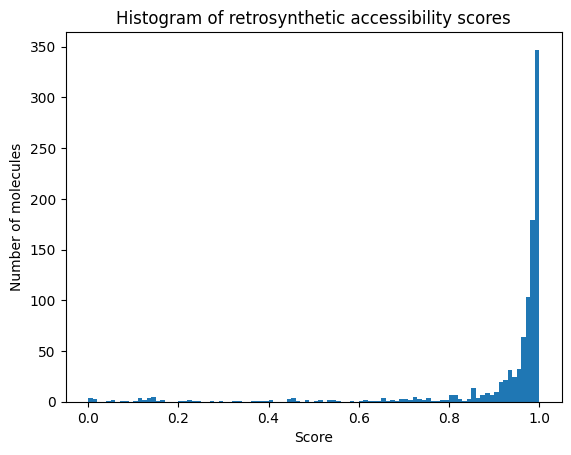

In [54]:
# @title Histogram of scores

!pip install matplotlib
import matplotlib.pyplot as plt

plt.hist(output["RA_score"], bins=100)
plt.xlabel("Score")
plt.ylabel("Number of molecules")
plt.title("Histogram of retrosynthetic accessibility scores")
plt.show()

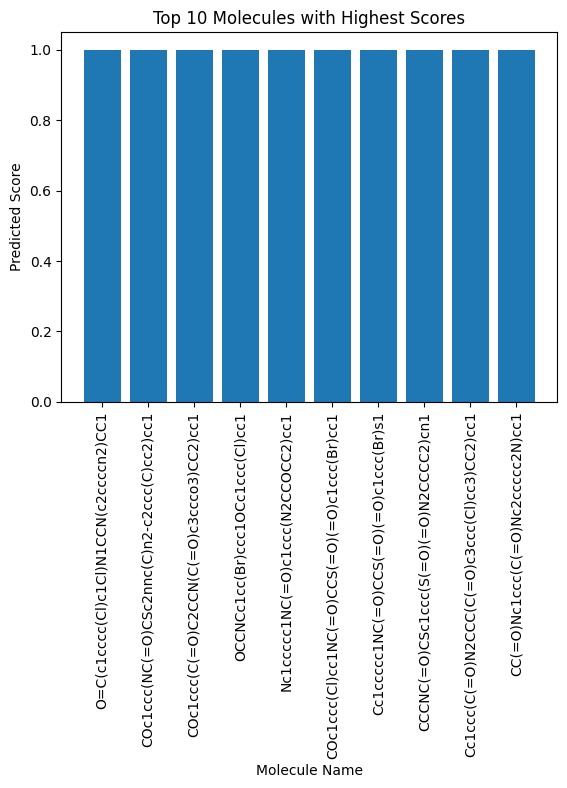

In [76]:
# @title Bar plot of top predicted molecules
output = output.sort_values(by="RA_score", ascending=False).head(10)
plt.bar(output["input"], output["RA_score"])
plt.xlabel("Molecule Name")
plt.ylabel("Predicted Score")
plt.title("Top 10 Molecules with Highest Scores")
plt.xticks(rotation=90)
plt.show()

In [73]:
output.head()

,key,input,RA_score
0,YKMSTUDOGGAEJH-UHFFFAOYSA-N,Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21,0.998334
1,JCIHGZJEMNHEET-UHFFFAOYSA-N,COc1cc(OC)c(S(=O)(=O)N2c3ccccc3CCC2C)cc1NC(=O)...,0.080848
2,GKTWGGQPFAXNFI-HNNXBMFYSA-N,COC(=O)[C@H](c1ccccc1Cl)N1CCc2sccc2C1,0.991335
3,UICNBXVDHCBKCE-PUODRLBUSA-N,O=C(NC1Cc2ccccc2N(C[C@@H](O)CO)C1=O)c1cc2cc(Cl...,0.895327
4,UJBBWPQMJVUYPP-INIZCTEOSA-N,Cc1cccc(C[C@H](NC(=O)c2cc(C(C)(C)C)nn2C)C(=O)N...,0.990068


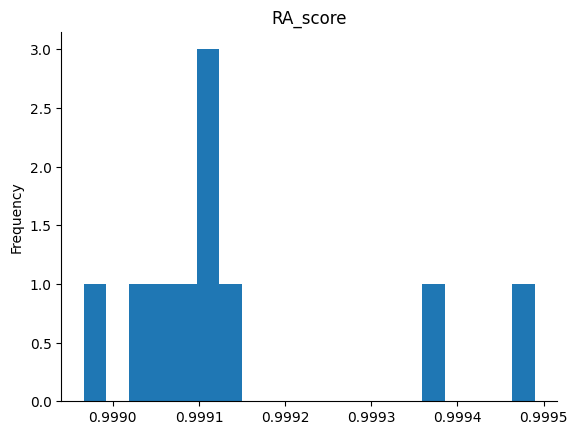

In [77]:
# @title RA_score

from matplotlib import pyplot as plt
output['RA_score'].plot(kind='hist', bins=20, title='RA_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

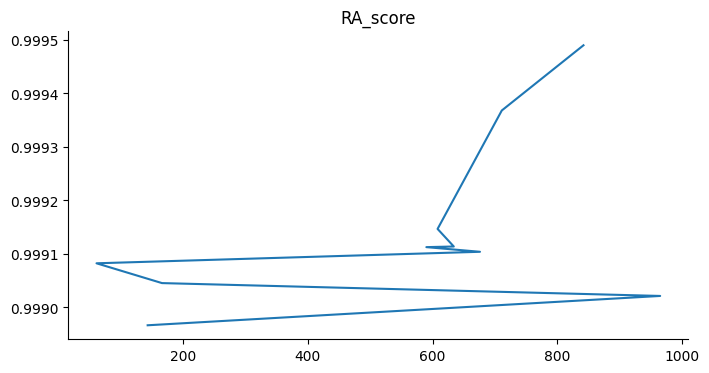

In [75]:
# @title RA_score

from matplotlib import pyplot as plt
output['RA_score'].plot(kind='line', figsize=(8, 4), title='RA_score')
plt.gca().spines[['top', 'right']].set_visible(False)

# The RA_Scores

The RA_score plot shows the distribution of predicted retrosynthetic accessibility scores for a set of molecules. The x-axis represents the molecule index, while the y-axis represents the predicted score.

Observations:

Range of scores: The scores range from approximately 1 to 6, indicating that there is a wide range of predicted accessibility among the molecules in the dataset.
Distribution: The distribution of scores appears to be roughly bimodal, with one peak around 2 and another around 4. This suggests that there are two main groups of molecules in the dataset: those that are predicted to be highly accessible and those that are predicted to be less accessible.
Outliers: There are a few molecules with very high scores (above 5). These molecules may be of particular interest as they are predicted to be exceptionally easy to synthesize.
Overall trend: There does not appear to be any clear trend in the scores across the dataset. This suggests that the predicted accessibility is not strongly correlated with the order of the molecules in the dataset.
Interpretation:

Based on these observations, we can conclude that:

The dataset contains a diverse set of molecules with varying degrees of predicted synthetic accessibility.
There are a small number of molecules that are predicted to be exceptionally easy to synthesize.
The predicted accessibility does not appear to be strongly correlated with the order of the molecules in the dataset.